In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import KMeans

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

palette = ["#f72585", "#b5179e", "#3a0ca3", "#4361ee", "#4cc9f0"]

sns.set_style("ticks",{'axes.grid' : True})
sns.set_context("notebook")

In [3]:
df = pd.read_csv("./data/marketing_campaign.csv", delimiter="\t")

In [4]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

# Data Cleaning and Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

**Based on the output above the following steps that must be done:**
* The ***Income*** column has missing values, which I will drop
* The ***Education*** and ***Martial_Status*** should be converted to a categorical column.
* The ***Dt_Customer*** shoud be converted to the DateTime dtype for easier analysis 

First I will remove all the NaN value rows in the data

In [7]:
# Removing all NaN values
print(f"Old length of df: {len(df)}")
df = df.dropna()
print(f"New length of df: {len(df)}")

Old length of df: 2240
New length of df: 2216


Next, I will convert the ***Dt_Customer*** column into a DateTime object. I will also create a new feature called ***Active_Days***, which gives us the number of days the user has been active relative to the most recent customer.

In [8]:
# Converting the Dt_Customer column to DateTime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"].values, dayfirst=True)

# Creating the Active_Days columns
most_recent_join_date = df["Dt_Customer"].max()
df["Active_Days"] = df["Dt_Customer"].apply(lambda x: (most_recent_join_date - x).days)

# Deleting the Dt_Customer column
df = df.drop(columns=["Dt_Customer"])

I will then format the data a bit more and also do feature engineering to have more concise features

In [9]:
# Converting Year_Birth to Age
df["Age"] = most_recent_join_date.year - df["Year_Birth"]  

# Creating a total spending column
df["Spending"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntMeatProducts"] + df["MntSweetProducts"] + df["MntWines"] 

# Creating a column called Children_Num that gives us the total number of children in the household 
df["Children_Num"] = df["Kidhome"] + df["Teenhome"]

# Converting the Martial_Status to 1: For Living with a partner or 0: Living Alone
df["Marital_Status"] = df["Marital_Status"].replace({'Divorced':0,'Single':0,'Married':1,'Together':1,'Absurd':0,'Widow':0,'YOLO':0, 'Alone':0})

# Renaming the Mnt columns for easy understanding
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

df = df.drop(columns=[
    "Year_Birth",
    "ID",
    "Z_CostContact", # This column has only 1 values
    "Z_Revenue" # This column has only 1 values
])

Next, I will look for outliers in the data

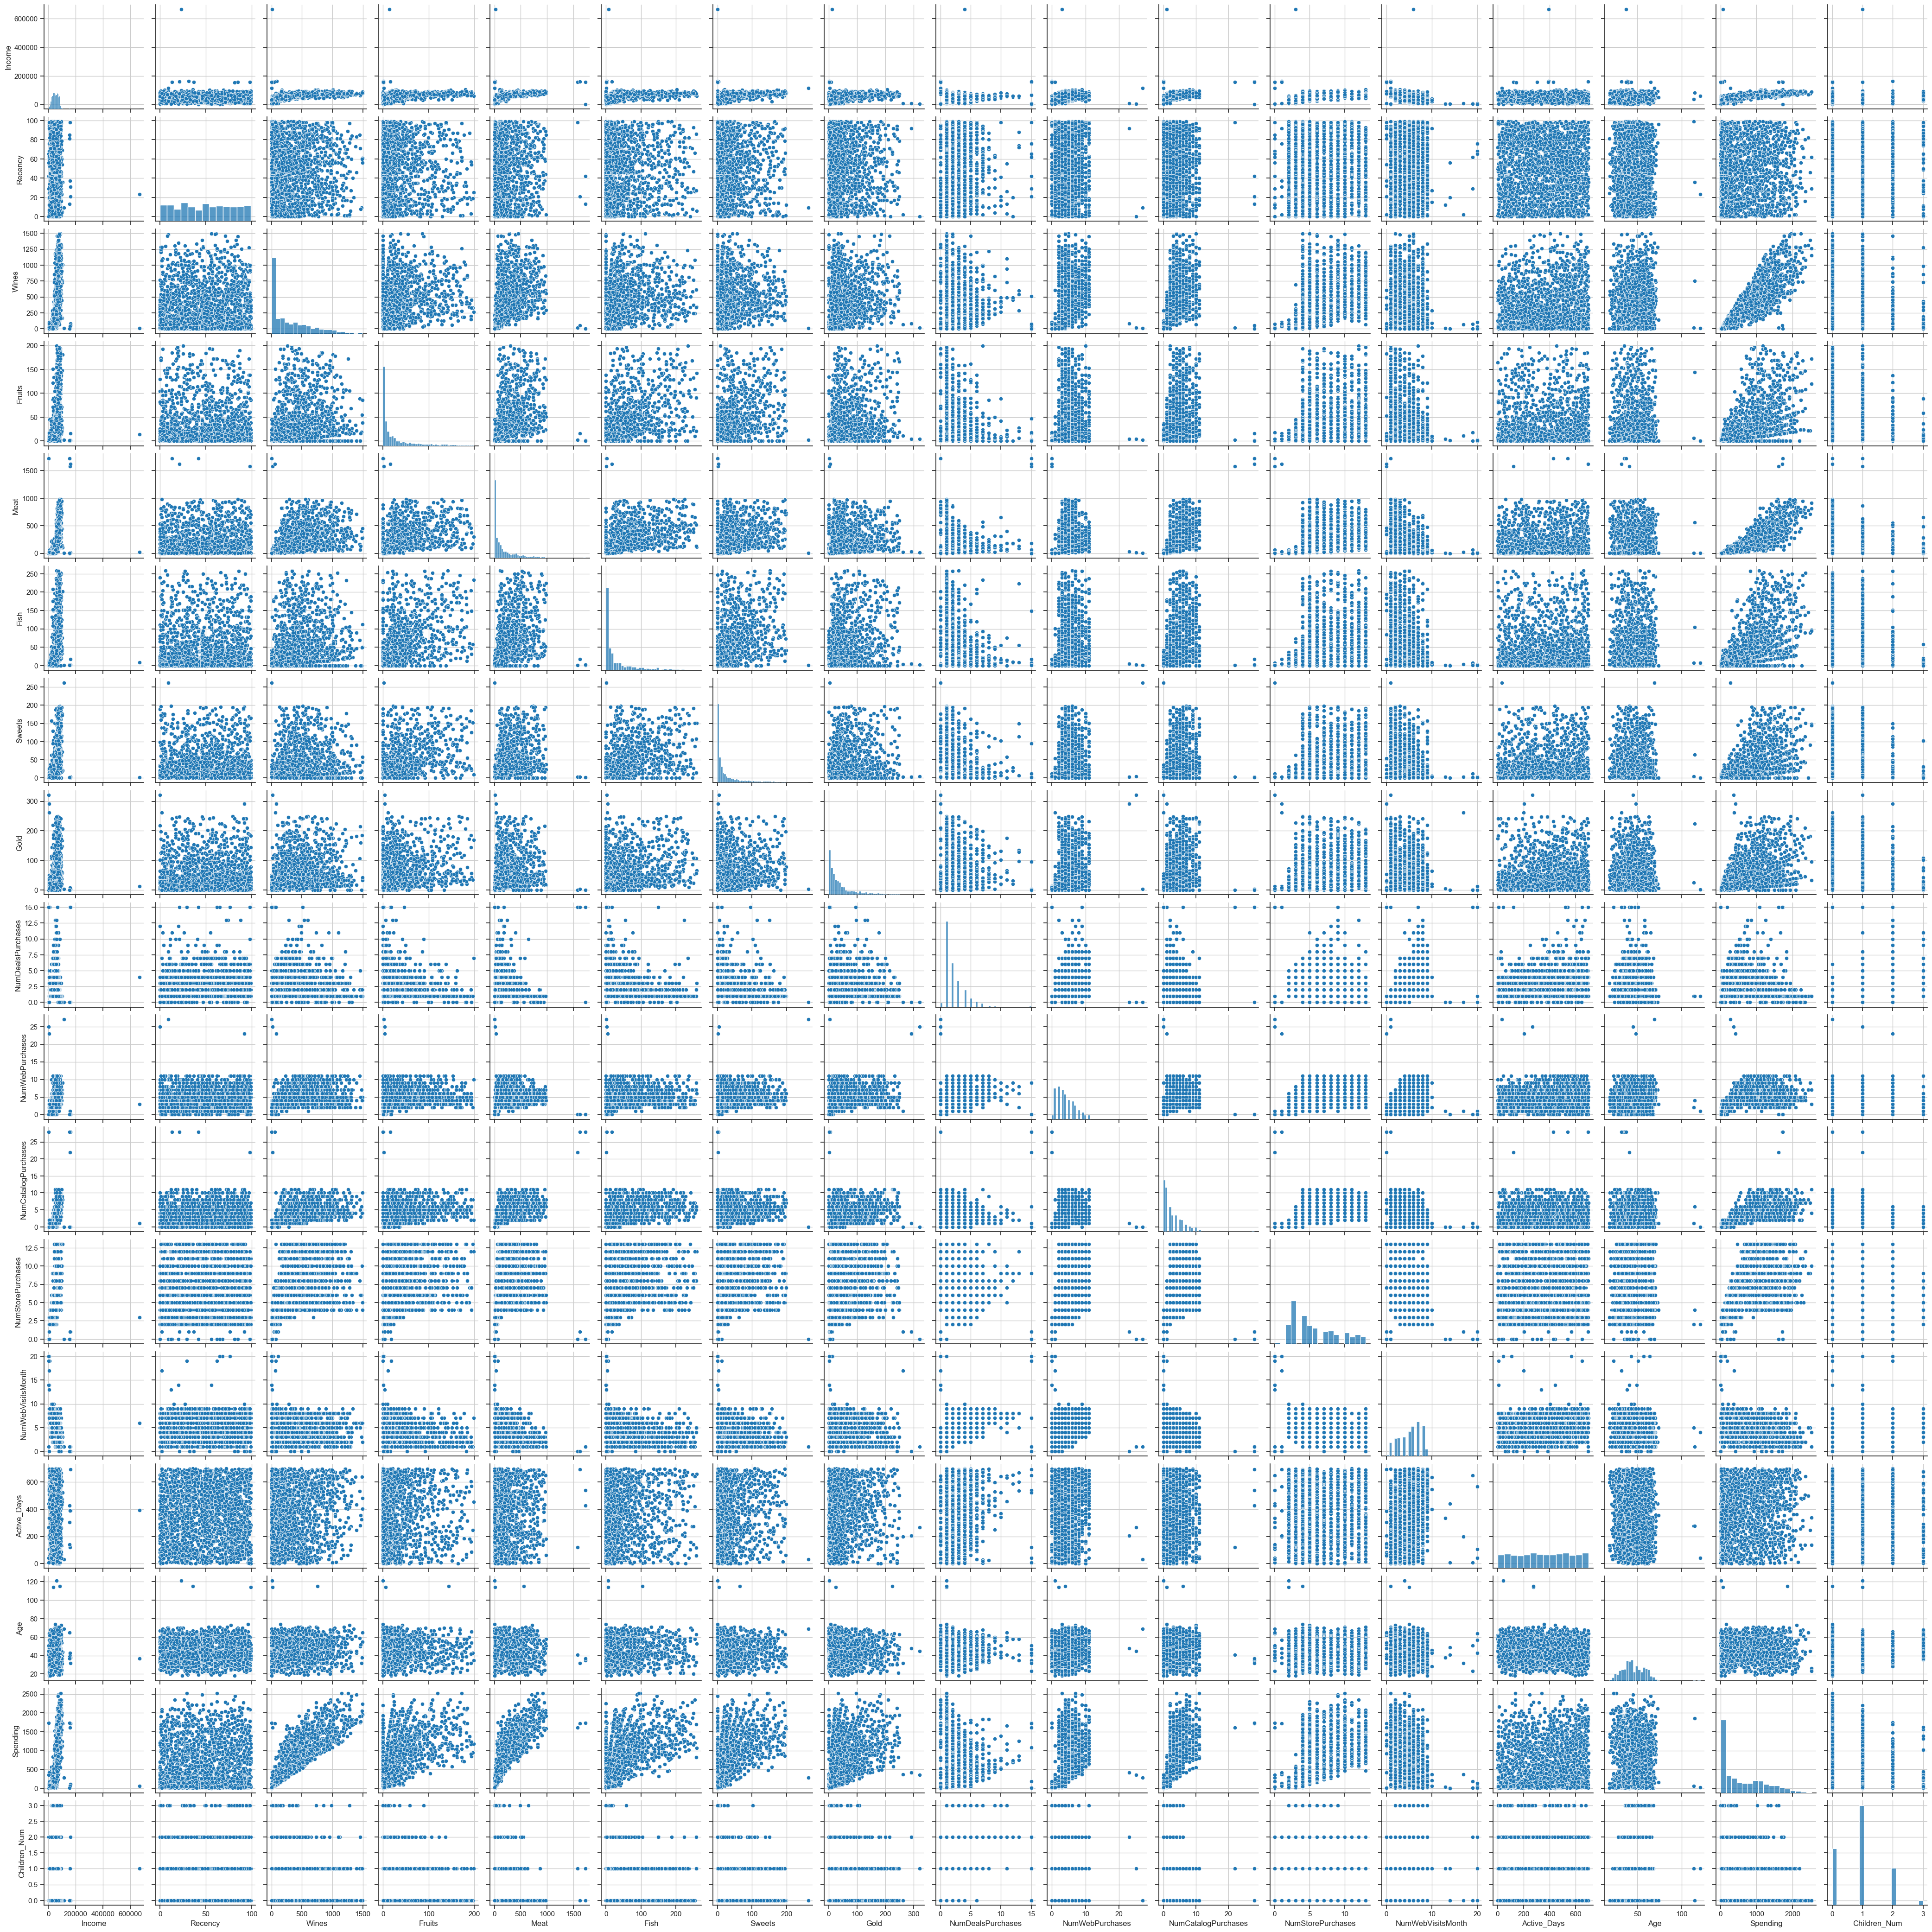

In [10]:
cols = [ 'Income', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Active_Days', 'Age', 'Spending',
       'Children_Num']

sns.pairplot(df[cols], palette=palette)

I see that the Age and Income columns have outlier values

In [11]:
# Setting a limit to Age and Income Column based on the above plot, here just setting limit to age and income would do the trick since all values seem to be evenly distributed
df = df[df["Age"] < 100]
df = df[df["Income"] < 400000]
print("Length of the cleaned data: ", len(df))

Length of the cleaned data:  2212


In [12]:
df.reset_index(drop=True, inplace=True)

Next, I will look at the correaltion between the different features

<Axes: >

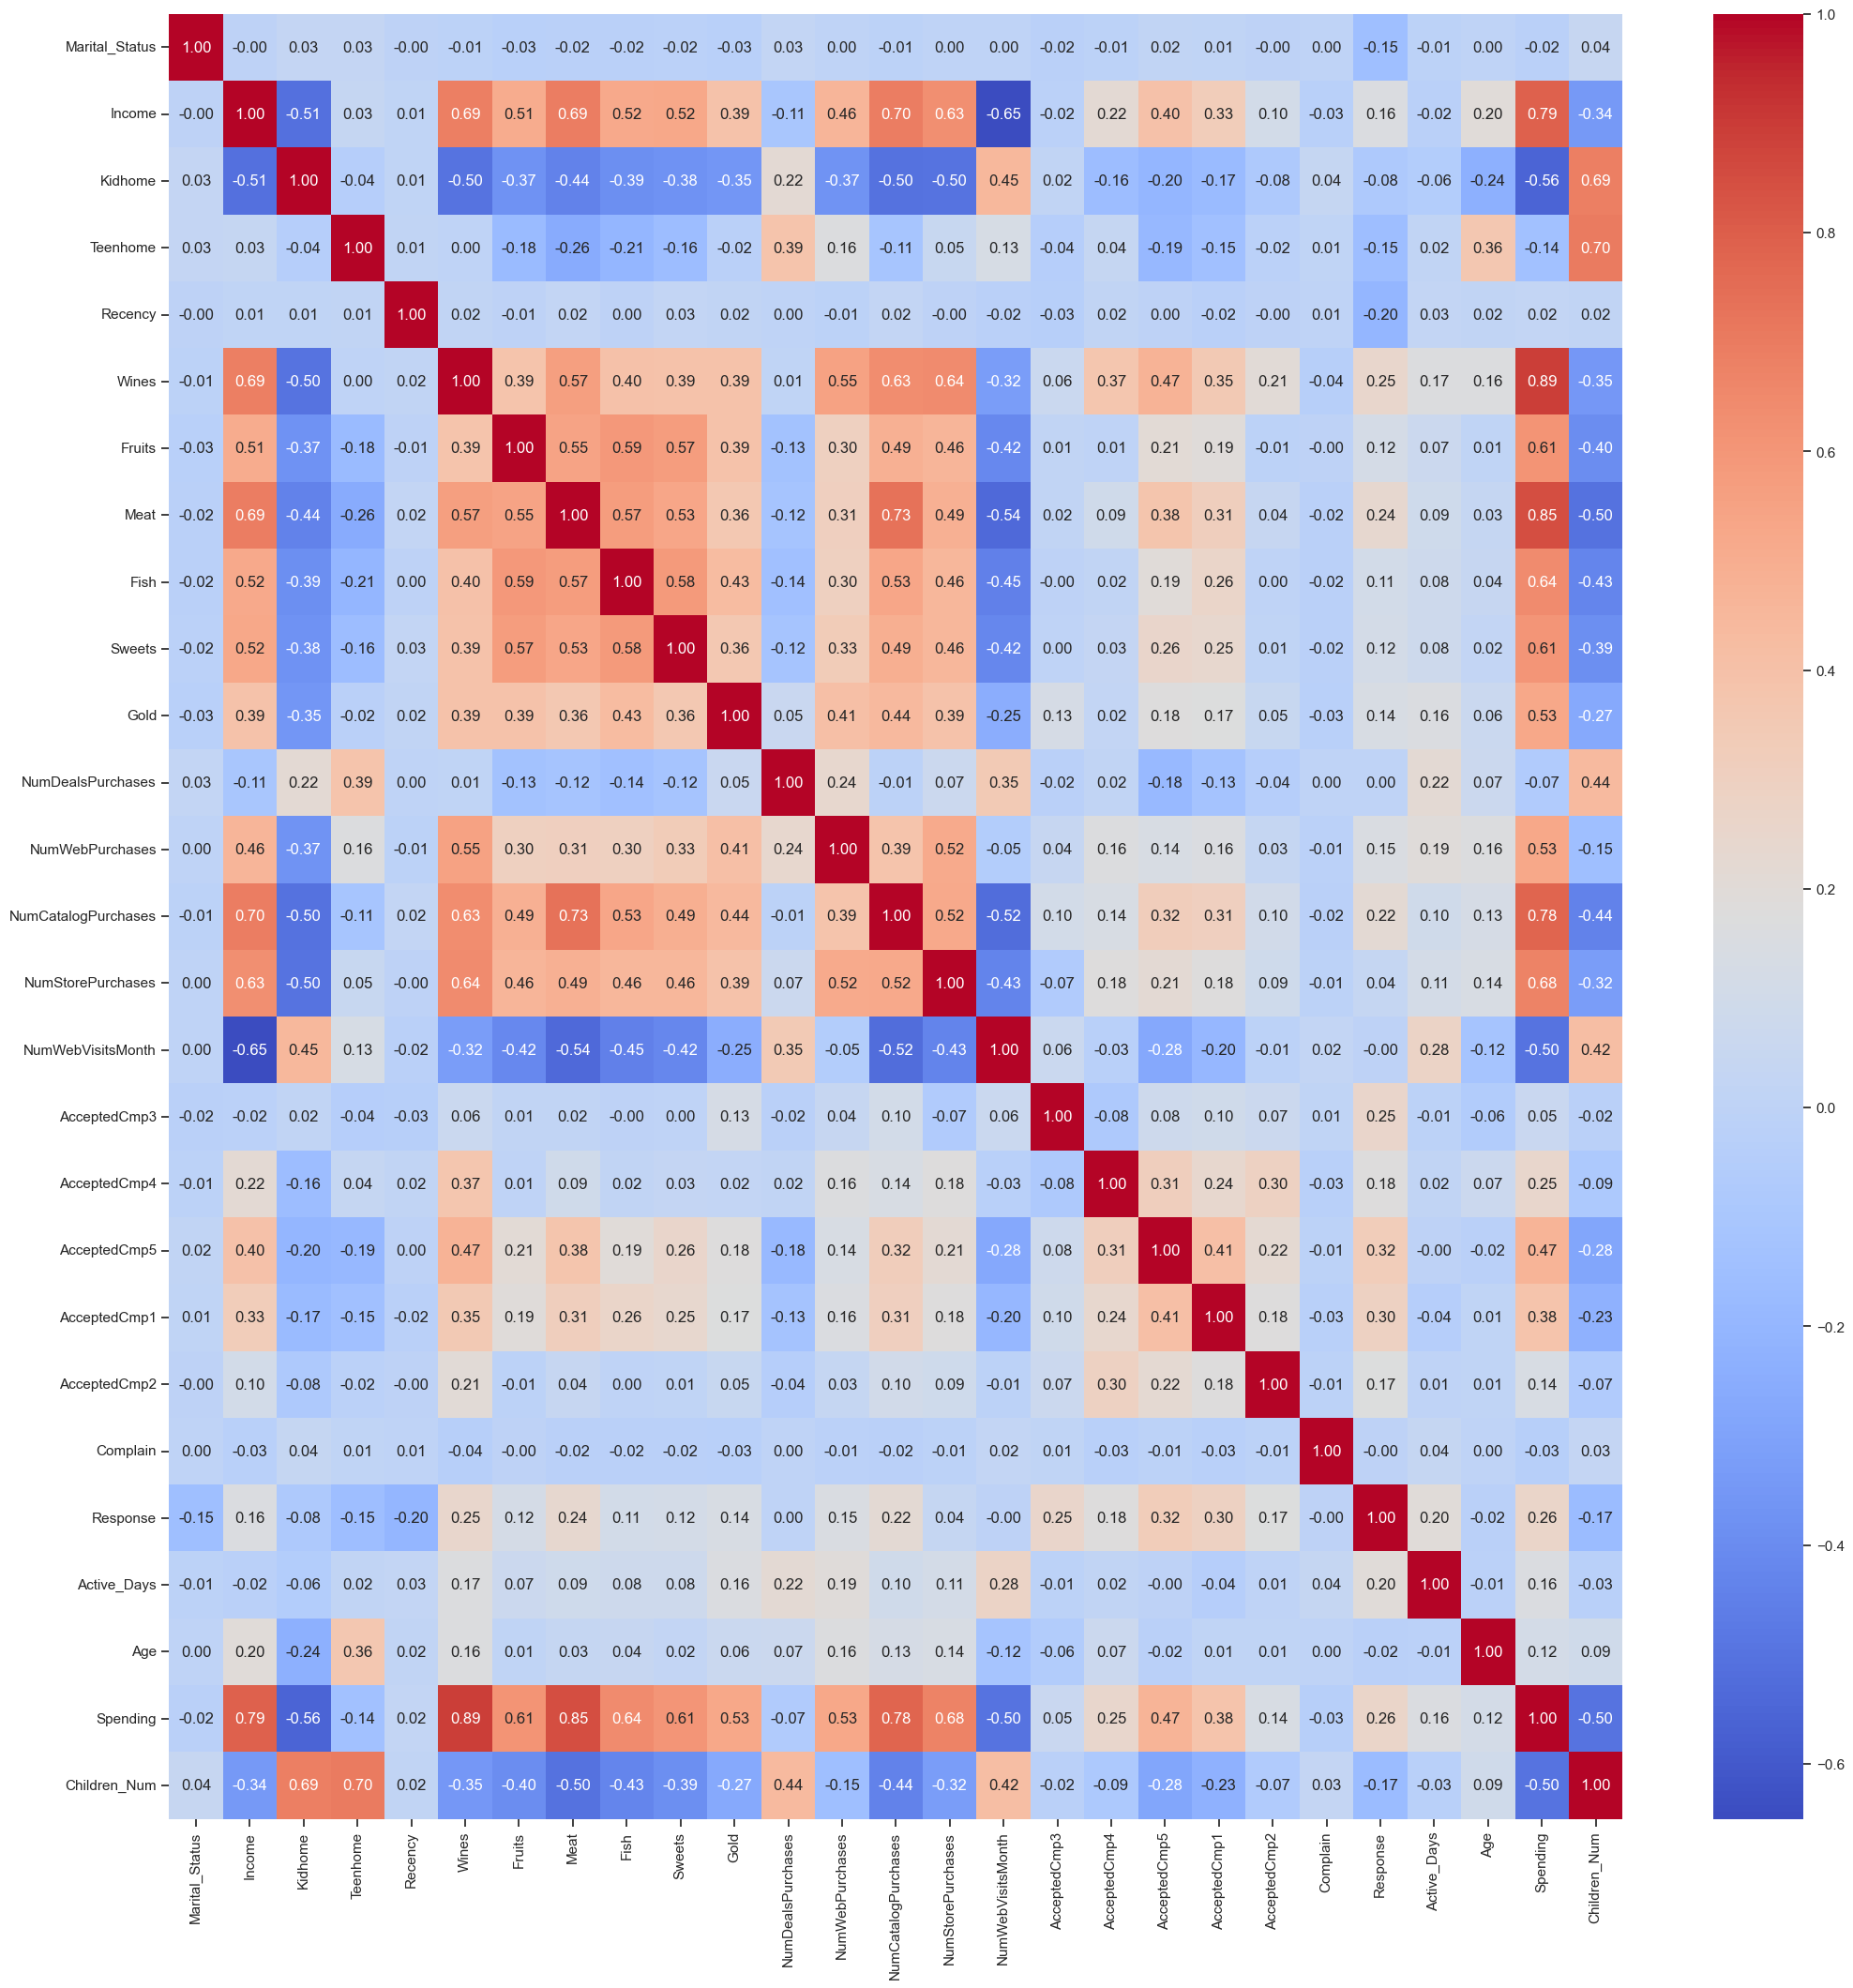

In [13]:
# We must remove our categorical variables from our data for the correaltion
cat_cols = ["Education"]
corr_data = df.loc[:, ~df.columns.isin(cat_cols)].corr()
plt.figure(figsize=(25,25))  
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f")

**From the above plot we can make the following conclusion:**
* Higher the users income or spending, the more they appear to spend money on wine and meat in comparison to other catgories.
* High income users seem to visit the website less than lower income users.
* High income users appear to purchase more using catalogue in comparsion to web and store purchases
* Users who buy more meat tend to purchases using the catalogue

# Data Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Active_Days', 'Age', 'Spending',
       'Children_Num'],
      dtype='object')

To ensure the all the features of the data are on similar scale we will use the StandardScaler to Z-score normalize the data. If the features are not on the same scale, the clustering algorithm will be biased towards the features with higher values.

In [16]:
# Converting Education to a numerical value
df["Education"] = df["Education"].replace({"Basic":0, "2n Cycle": 1, "Graduation":2, "Master":3, "PhD":4})

# Selecting columns that need scaling
scale_cols = ['Income', 'Recency', 'Wines', 'Fruits','Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Active_Days',
       'Age', 'Spending']

# Standardising The Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

# Adding the other vairables to the scaled data
df_scaled = pd.concat([df_scaled, df.loc[:, ~df.columns.isin(scale_cols)]], axis=1)

# Clustering Using K-Means

I will be using unsupervised algorithm KMeans to cluster the data. KMeans requires that we know the number of clusters we want to create. Since we do not know the number of clusters that exist in our data, we will use the Elbow Method to determine the optimal number of clusters. 

In [111]:
# Using the Elbow method to identify the optimal number of clusters
WCSS = {} # dictionary to store

for K in range(1, 10): # Running for 9 clusters
    kmeans = KMeans(K) # Initializing K-Means
    kmeans.fit(df_scaled.values) # Obtaining the within custer sum of squares
    WCSS[K] = kmeans.inertia_
    
WCSS = pd.DataFrame(WCSS, index=[0])

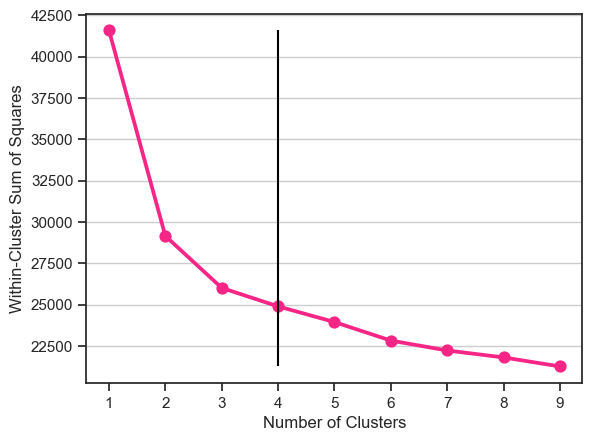

In [130]:
# Plotting
sns.pointplot(data=WCSS, c=palette[0])
plt.ylabel("Within-Cluster Sum of Squares")
plt.xlabel("Number of Clusters")
plt.vlines(3, ymin=WCSS.min(axis=1).values[0], ymax=WCSS.max(axis=1).values[0], color="black")

Based on the Within Cluster Sum of Squares, the optimal number of clusters is 4. We will now proceed to fit the KMeans model with 4 clusters.

# Finalizing K-Means Model

In [17]:
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(df_scaled.values)

predictions = kmeans_model.predict(df_scaled.values)

In [18]:
df["Predictions"] = predictions # Storing the predictions in the original dataframe

# Visualizations and Profiling

First I want to see how the clusters are distributed based on the Age and Income columns

<Axes: xlabel='Spending', ylabel='Income'>

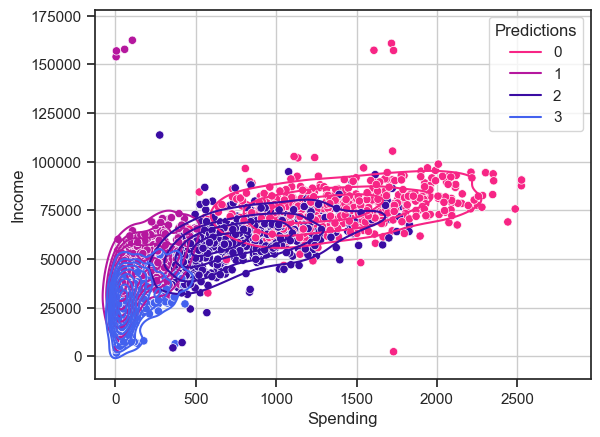

In [19]:
sns.scatterplot(data=df, x='Spending', y="Income", hue="Predictions", palette=palette)
sns.kdeplot(data=df, x='Spending', y="Income", hue="Predictions", palette=palette)

It appears that:
- Group 0: contains customers with **High Income** and **High Spending**
- Group 1: contains customers with **Average Income** and **Low Spending**
- Group 2: contains customers with **Average Income** and **Average Spending**
- Group 3: contains customers with **Low Income** and **Low Spending**

An alternate to visualize this data is using a sankey plot. First, I will bin the income and spending group, for this I wil use the following criterais:
- If the spending/income is below the 30th percentile, the user would be in the bin of low spending/income
- If the spending/income is between the 30th and 70th percentile, the user would be in the bin of average spending/income
- If the spending/income is higher the 70th percentile, the user would be in the bin of high spending/income

In [20]:
import plotly.graph_objs as go

In [331]:
# Segmenting the data into groups for spending
low_threshold = np.percentile(df["Spending"], 30)
high_threshold = np.percentile(df["Spending"], 70)

below = df[df["Spending"] <= low_threshold]
average = df[(df["Spending"] > low_threshold) & (df["Spending"] <= high_threshold)] 
above = df[df["Spending"] > high_threshold]

print("Low Spending Group Count: ", len(below))
print("Average Spending Group Count: ", len(average))
print("High Spending Group Count: ", len(above))

df["Spending_Group"] = np.nan
df["Spending_Group"][df.index.isin(below.index)] = "Low Spending"
df["Spending_Group"][df.index.isin(average.index)] = "Average Spending"
df["Spending_Group"][df.index.isin(above.index)] = "High Spending"

Low Spending Group Count:  666
Average Spending Group Count:  886
High Spending Group Count:  660


In [332]:
# Segmenting the data into groups for spending
low_threshold = np.percentile(df["Income"], 30)
high_threshold = np.percentile(df["Income"], 70)

below = df[df["Income"] <= low_threshold]
average = df[(df["Income"] > low_threshold) & (df["Income"] <= high_threshold)] 
above = df[df["Income"] > high_threshold]

print("Low Spending Group Count: ", len(below))
print("Average Spending Group Count: ", len(average))
print("High Spending Group Count: ", len(above))

df["Income_Group"] = np.nan
df["Income_Group"][df.index.isin(below.index)] = "Low Income"
df["Income_Group"][df.index.isin(average.index)] = "Average Income"
df["Income_Group"][df.index.isin(above.index)] = "High Income"

Low Spending Group Count:  664
Average Spending Group Count:  884
High Spending Group Count:  664


In [333]:
sankey_data = df[["Income_Group", "Spending_Group", "Predictions"]]
sankey_data["Predictions"] = sankey_data["Predictions"].apply(lambda x: f"Group {x}")

I will additionally information if the users are married and if they have children or

In [334]:
sank_temp = df[["Marital_Status", "Kidhome", "Teenhome"]]

sank_temp["Marital_Status"] = sank_temp["Marital_Status"].replace({0:"Un-Married", 1:"Married"})

children_column = []

for i in range(len(sank_temp)):
    kids = sank_temp.iloc[i]["Kidhome"]
    teens = sank_temp.iloc[i]["Teenhome"]

    if kids + teens == 0:
        children_column.append("No Children")
    elif kids == 0:
        children_column.append("Teenagers")
    elif teens == 0:
        children_column.append("Kids")
    else:
        children_column.append("Teenagers & Kids")
    
sank_temp["Children_Status"] = children_column
sank_temp.reset_index(drop=True, inplace=True)

In [335]:
sankey_data = pd.concat([sankey_data, sank_temp[["Marital_Status", "Children_Status"]]], axis=1)

In [336]:
mariage_to_children = sankey_data.groupby(["Marital_Status", "Children_Status"]).count().reset_index().iloc[:,:-2]
mariage_to_children.columns = ['Source', 'Target', 'Value']

children_to_income = sankey_data.groupby(["Children_Status", "Income_Group"]).count().reset_index().iloc[:,:-2]
children_to_income.columns = ['Source', 'Target', 'Value']

# First, get flows from Income_Group to Spending_Group
income_to_spending = sankey_data.groupby(['Income_Group', 'Spending_Group']).count().reset_index().iloc[:,:-2]
income_to_spending.columns = ['Source', 'Target', 'Value']

# Then, get flows from Spending_Group to Predictions
spending_to_predictions = sankey_data.groupby(['Spending_Group', 'Predictions']).count().reset_index().iloc[:,:-2]
spending_to_predictions.columns = ['Source', 'Target', 'Value']

# Combine both flows into one DataFrame
sankey_data = pd.concat([mariage_to_children, children_to_income, income_to_spending, spending_to_predictions])

In [337]:
mapping = {"Married":0,
           "Un-Married":1,
           "No Children":2,
           "Kids":3,
           "Teenagers":4,
           "Teenagers & Kids" :5,
           "Low Income":6, 
           "Average Income":7, 
           "High Income":8, 
           "Low Spending":9, 
           "Average Spending":10, 
           "High Spending":11, 
           "Group 0":12, 
           "Group 1":13, 
           "Group 2":14,
           "Group 3":15,              
          }

In [338]:
sankey_data["Source"] = sankey_data["Source"].apply(lambda x: mapping[x])
sankey_data["Target"] = sankey_data["Target"].apply(lambda x: mapping[x])

In [339]:
link = dict(source=sankey_data["Source"].values, target=sankey_data["Target"].values, value=sankey_data["Value"].values)
node = dict(label=list(mapping.keys()))

In [394]:
chart = go.Sankey(link=link, node=node, arrangement="snap")
fig = go.Figure(chart)
fig.show()

Next, I want to see how the classified groups accept or respond to the different campaigns

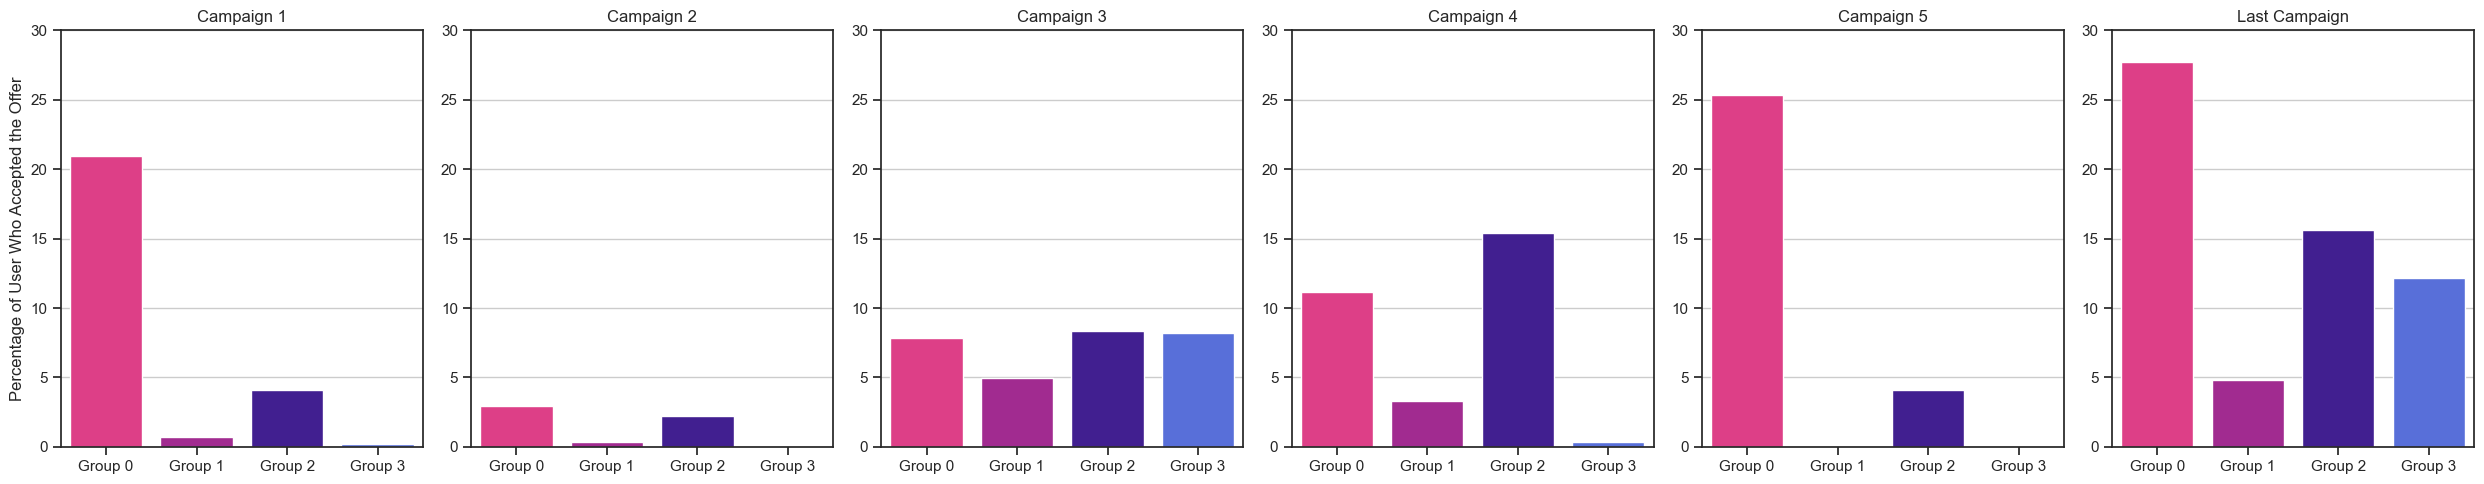

In [341]:
columns = ["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5", "Response"]

fig, axs = plt.subplots(1, len(columns), figsize=(25,5))

for i in range(len(columns)):
    counts = df[[columns[i], "Predictions"]].value_counts() # Getting the total number of users who accepted the offer
    counts = counts[1] / (counts[1] + counts[0]) * 100 # Getting the percentage of users who accepted the offer
    counts = counts.fillna(0.0)
    counts = pd.DataFrame(counts).reset_index()
    counts.columns = ["Predictions", "count"]
    
    sns.barplot(data=counts, x="Predictions", y="count", ax=axs[i], palette=palette, fill=True)
    
    title = "Last Campaign" if i == len(columns)-1 else f"Campaign {i+1}"
    ylabel = "Percentage of User Who Accepted the Offer" if i == 0 else ""
    
    axs[i].set_title(title)
    axs[i].set_ylabel(ylabel)
    axs[i].set_ylim([0, 30])
    axs[i].set_xticklabels(["Group 0", "Group 1", "Group 2", "Group 3"])
    axs[i].set_xlabel("")
    
plt.tight_layout()

It appears that Group 0 has the highest acceptance rate for most of the campaigns. Furthermore, Group 1 has the lowest acceptance rate for most of the campaigns. Finally, it appears that the last campaign had the highest acceptance rate overall.

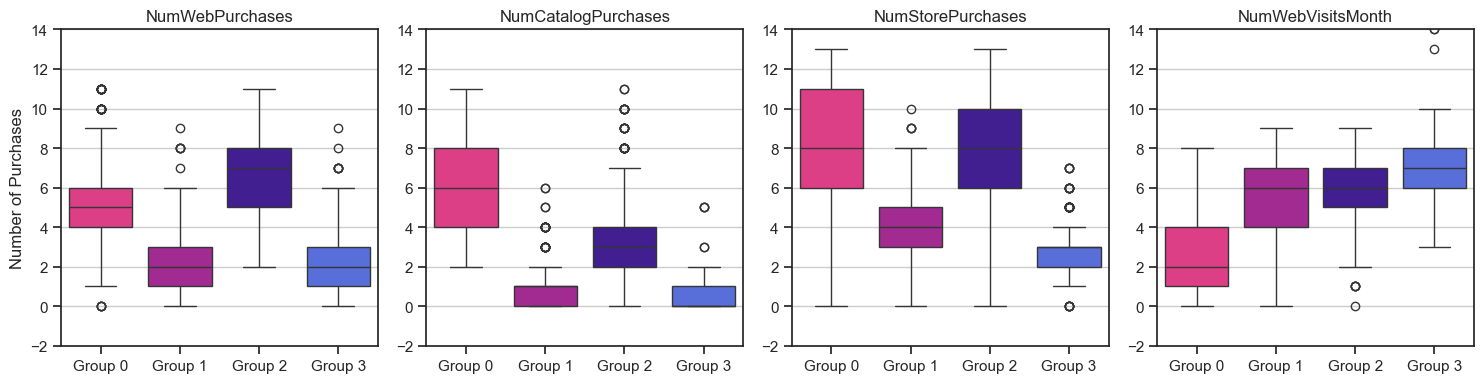

In [342]:
columns = ["NumWebPurchases", "NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]

fig, axs = plt.subplots(1, len(columns), figsize=(15,4))

for i in range(len(columns)):
    counts = df[[columns[i], "Predictions"]]
    
    sns.boxplot(data=counts, x="Predictions", y=columns[i], ax=axs[i], palette=palette)
    
    ylabel = "Number of Purchases" if i == 0 else ""
    
    axs[i].set_title(columns[i])
    axs[i].set_ylabel(ylabel)
    axs[i].set_ylim([-2, 14])
    axs[i].set_xticklabels(["Group 0", "Group 1", "Group 2", "Group 3"])
    axs[i].set_xlabel("")
    
plt.tight_layout()

It appears that on average Groups 0, 1, and 2 purchase more items in the store than other channels. Groups 1 and 2 show a higher purchase via the web than catalog purchases where as Group 0 shows a higher purchase via catalog than the web. Despite the higher number of website visits, Group 3 has the lowest number of purchases via a channels, indicating that this group is the low conversion group.

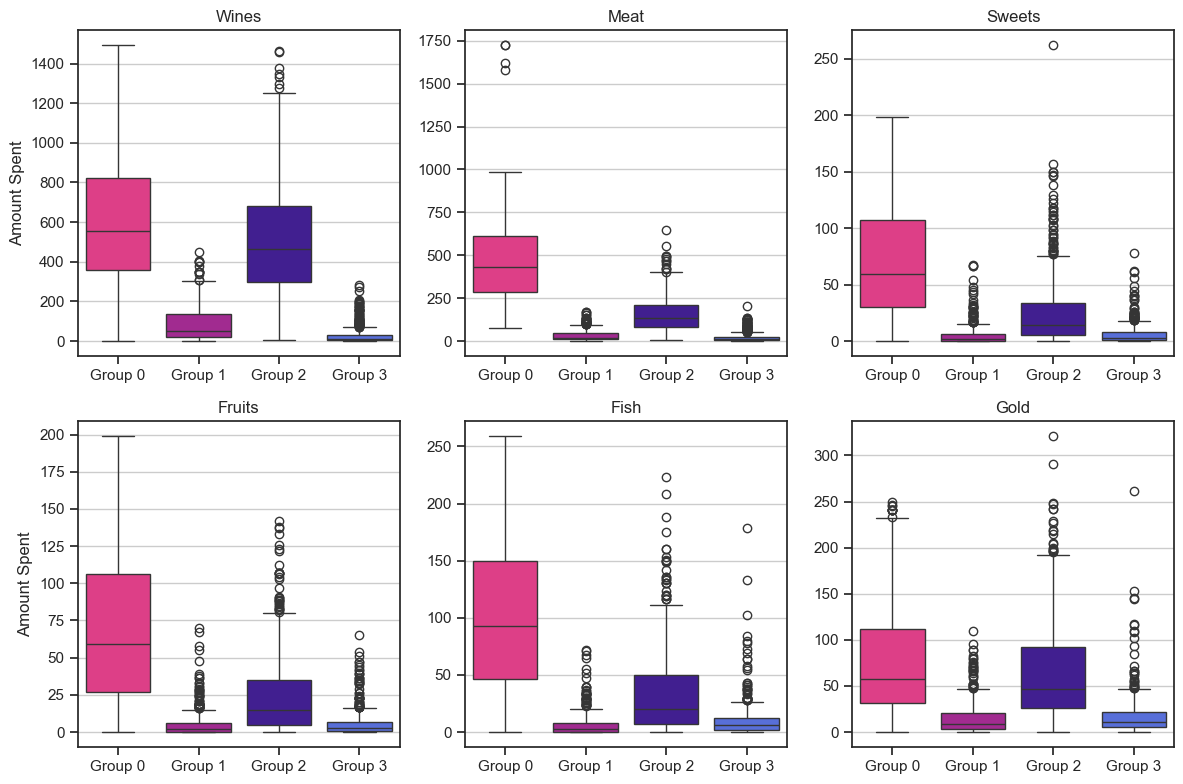

In [343]:
columns = ["Wines", "Fruits","Meat","Fish", "Sweets", "Gold"]

fig, axs = plt.subplots(2, int(len(columns)/2), figsize=(12,8))

for i in range(len(columns)):
    idx_i = i % 2
    idx_j = i // 2

    counts = df[[columns[i], "Predictions"]]
    
    sns.boxplot(data=counts, x="Predictions", y=columns[i], ax=axs[idx_i][idx_j], palette=palette)
    
    ylabel = "Amount Spent" if idx_j == 0 else ""
    
    axs[idx_i][idx_j].set_title(columns[i])
    axs[idx_i][idx_j].set_ylabel(ylabel)
    axs[idx_i][idx_j].set_xticklabels(["Group 0", "Group 1", "Group 2", "Group 3"])
    axs[idx_i][idx_j].set_xlabel("")
    
plt.tight_layout()

In [39]:
for i in range(4):
    print(f"Group {i} spends the most on: ", df[df["Predictions"] == i][["Wines", "Fruits","Meat","Fish", "Sweets", "Gold"]].median().idxmax())

Group 0 spends the most on:  Wines
Group 1 spends the most on:  Wines
Group 2 spends the most on:  Wines
Group 3 spends the most on:  Meat


The most amount of money is spent on wines with Groups 0 and 2 being the largest contributers, potentialy due to the higher income.

Text(0.5, 1.0, 'Marital Status Distribution')

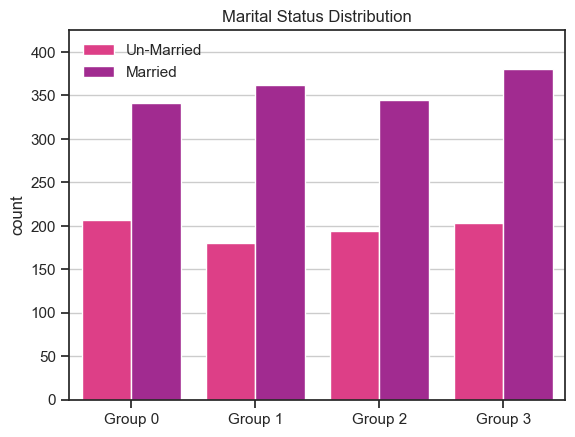

In [276]:
sns.countplot(data=df, x="Predictions", hue="Marital_Status", palette=palette)
plt.xticks([0, 1, 2, 3], ["Group 0", "Group 1", "Group 2", "Group 3"])
plt.xlabel("")
plt.ylim([0, 425])
l = {1:"Married", 0:"Un-Married"}
plt.legend(labels=[l[i] for i in range(2)], frameon=False)  
plt.title("Marital Status Distribution")


Text(0.5, 1.0, 'Children Distribution')

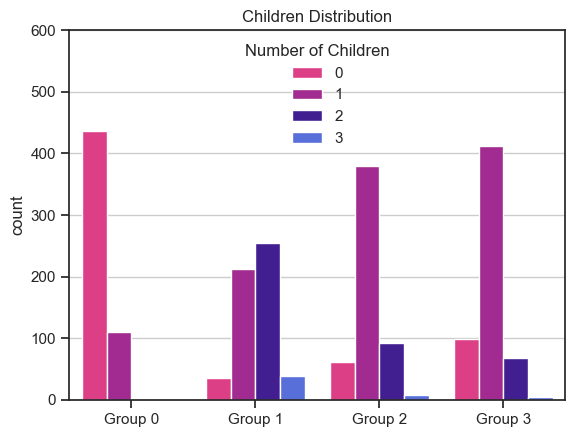

In [290]:
sns.countplot(data=df, x="Predictions", hue="Children_Num", palette=palette)
plt.xticks([0, 1, 2, 3], ["Group 0", "Group 1", "Group 2", "Group 3"])
plt.xlabel("")
plt.ylim([0, 600])
plt.legend(title="Number of Children", frameon=False)
plt.title("Children Distribution")

Text(0.5, 1.0, 'Education Distribution')

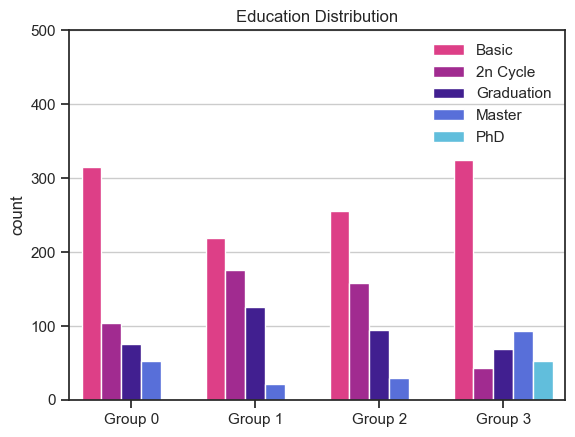

In [292]:
sns.countplot(data=df, x="Predictions", hue="Education", palette=palette)
plt.xticks([0, 1, 2, 3], ["Group 0", "Group 1", "Group 2", "Group 3"])
plt.xlabel("")
plt.ylim([0, 500])
l = {0:"Basic", 1:"2n Cycle",2:"Graduation", 3:"Master", 4:"PhD"}
plt.legend(labels=[l[i] for i in range(5)], frameon=False)  
plt.title("Education Distribution")

Text(0.5, 1.0, 'Age Distribution')

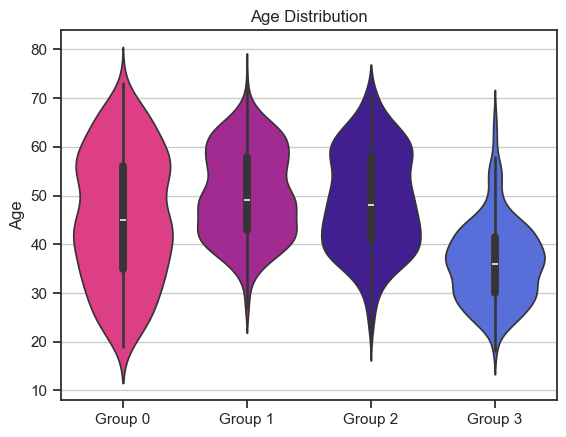

In [294]:
sns.violinplot(data=df, x="Predictions", y="Age", palette=palette)
plt.xticks([0, 1, 2, 3], ["Group 0", "Group 1", "Group 2", "Group 3"])
plt.xlabel("")
plt.title("Age Distribution")

Text(0.5, 1.0, 'Active Days Distribution')

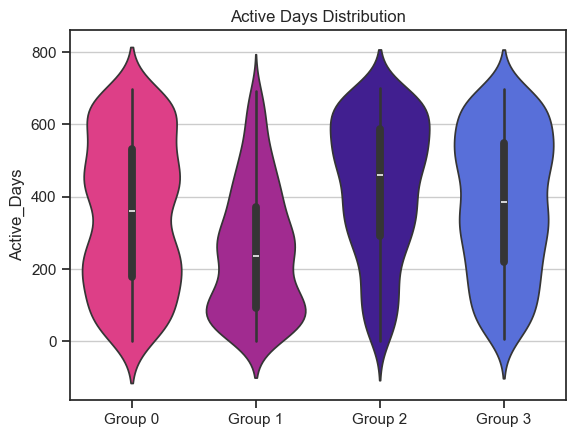

In [296]:
sns.violinplot(data=df, x="Predictions", y="Active_Days", palette=palette)
plt.xticks([0, 1, 2, 3], ["Group 0", "Group 1", "Group 2", "Group 3"])
plt.xlabel("")
plt.title("Active Days Distribution")

# Model Building

In [362]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score

Once we have profiled our users, now we can additionally also start buiding predictive models to estimate how much a user is likely to spend in the future. For this we will be using Linear Regression

In [346]:
# Here we are not going to be using the Wines, Fruits, Meat, Fish, Sweets, Gold columns as they are already included in the Spending column
prediction_variables = ["Wines", "Fruits","Meat","Fish", "Sweets", "Gold", "Spending"] 

In [347]:
X = df_scaled.loc[:, ~df_scaled.columns.isin(prediction_variables)].values
y = df["Spending"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of samples in training data: ", X_train.shape[0])
print("Number of samples in test data: ", X_test.shape[0])

Number of samples in training data:  1769
Number of samples in test data:  443


In [348]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_preds = reg.predict(X_test)

print("Average Spending: ", reg.intercept_)
print("Model Performence [R2 score]: ", reg.score(X_test, y_test))
print("Mean squared error: ", mean_squared_error(y_test, y_preds))
print("Mean absolute error: ", mean_absolute_error(y_test, y_preds))

Average Spending:  663.8758410288553
Model Performence [R2 score]:  0.8333959734749723
Mean squared error:  64439.95315494446
Mean absolute error:  173.9979761962935


We see that the model has an accuracy of 83.33% which is quite good.

Next, based on the profile of a new customer I will try to estimate which channel the customer is most likely to make a purchase from

In [363]:
# Constarined Model
remove_cols = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'Active_Days', 'Spending', ]

purchase_place_cols = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]

X = df_scaled.loc[:, ~df_scaled.columns.isin(remove_cols)]
labels = df.loc[:, df.columns.isin(purchase_place_cols)].apply(lambda x: x.values.argmax(), axis=1) # Getting the column with the highest value, ie: the place where the user purchases the most

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_preds = reg.predict(X_test)

accuracy = np.mean(y_test == y_preds)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1_score(y_test, y_preds, average="weighted"))
print("Recall Score: ", recall_score(y_test, y_preds, average="weighted"))
print("Precision Score: ", precision_score(y_test, y_preds, average="weighted"))

Accuracy:  0.6930022573363431
F1 Score:  0.659730330470581
Recall Score:  0.6930022573363431
Precision Score:  0.672893748400381


The model appears to have decent F1 score indicates that the model does a good job in estimating which channel a user is likely to make a purchase in.

# Additional Resources: Feature Selection

In [389]:
import shap

In [390]:
explainer = shap.Explainer(kmeans_model.predict, df_scaled)
shap_values = explainer(df_scaled)

PermutationExplainer explainer: 2213it [01:06, 29.77it/s]                          


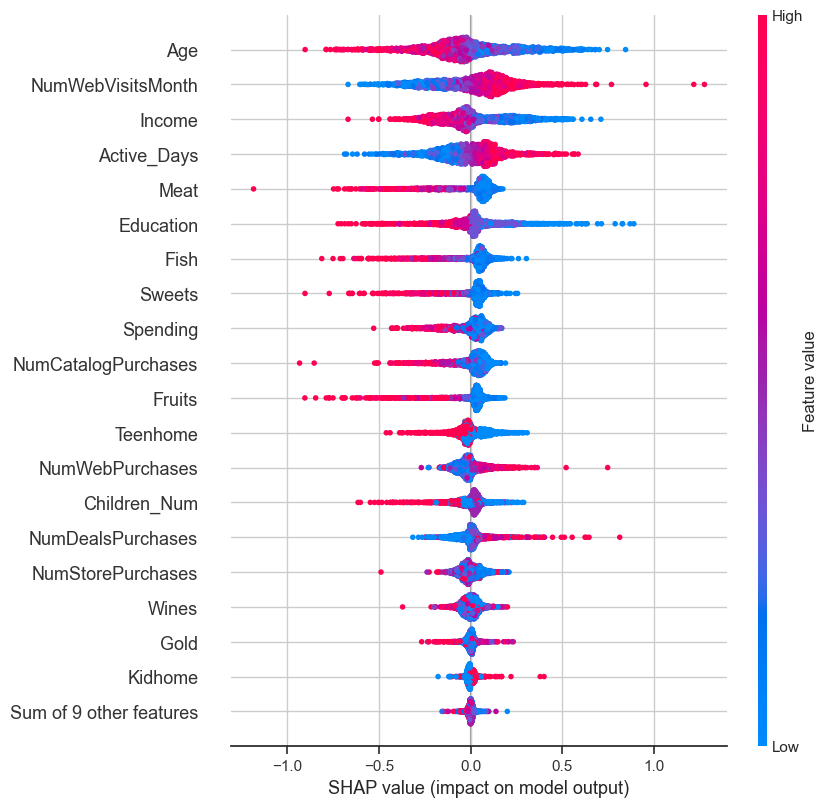

In [391]:
shap.plots.beeswarm(shap_values, max_display=20)

## PCA Feature Importance

In [378]:
from sklearn.decomposition import PCA

To identify which features contribute the most to the data we can use PCA to select the most important features. We can then use these features to train a model to predict the group of the user. PCA is a dimensionality reduction technique that can be used to reduce the number of features in a dataset while retaining the most important information.

In [379]:
n_components = 2
max_components = df.shape[1]

for i in range(max_components-2):
    pca = PCA(n_components=n_components)
    pca.fit(df_scaled.values)

    # Selecting the number of components that explain 70% of the variance. This is a commony used threshold to determine the number of components   
    if pca.explained_variance_ratio_.sum() > 0.7:
        print("Number of principal components required to explain 70% of the variance in the data: ", n_components)
        break
    
    n_components += 1

Number of principal components required to explain 70% of the variance in the data:  6


Text(0, 0.5, 'Explained Variance (per PC and Cummulative)')

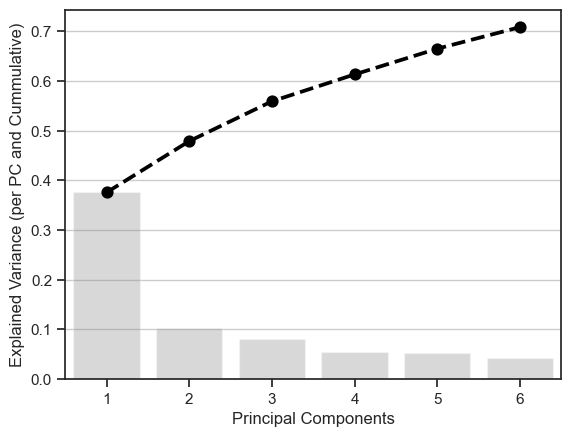

In [380]:
evr = pd.DataFrame(pca.explained_variance_ratio_, columns=["Explained Variance"]).reset_index()
evr['index'] = evr['index'] + 1
evr["Cummulative Sum"] = evr["Explained Variance"].cumsum()

sns.barplot(data=evr, x='index', y="Explained Variance", color="grey", alpha=0.3)
sns.pointplot(data=evr, x='index', y="Cummulative Sum", linestyles='--', color="black")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance (per PC and Cummulative)")

In [393]:
df_pca = pca.transform(df_scaled.values) # Transforming the data to the new PCA space

In [382]:
pca_cols = ["PC" + str(i+1) for i in range(n_components)] 
# By taking the dot product of the data and data in the PCA space, we can get the feature importance matrix. 
# Here if a value from the original data and its PCA projection are colinear, then this would yield a high values, whereas if they are orthogonal, then the value would be 0. 
feature_importance_matrix = np.dot(df_scaled.T.values, df_pca)  

# We then normalize all the features to get all values on the same scale so the values of the featurese are comparable
feature_importance_matrix = StandardScaler().fit_transform(feature_importance_matrix) 
feature_importance_matrix = pd.DataFrame(feature_importance_matrix, columns=pca_cols)
feature_importance_matrix.index = df_scaled.T.index

feature_importance_matrix = (feature_importance_matrix * pca.explained_variance_ratio_).abs()
feature_importance_matrix = feature_importance_matrix.sort_values(by=["PC1"], ascending=False)

<Axes: >

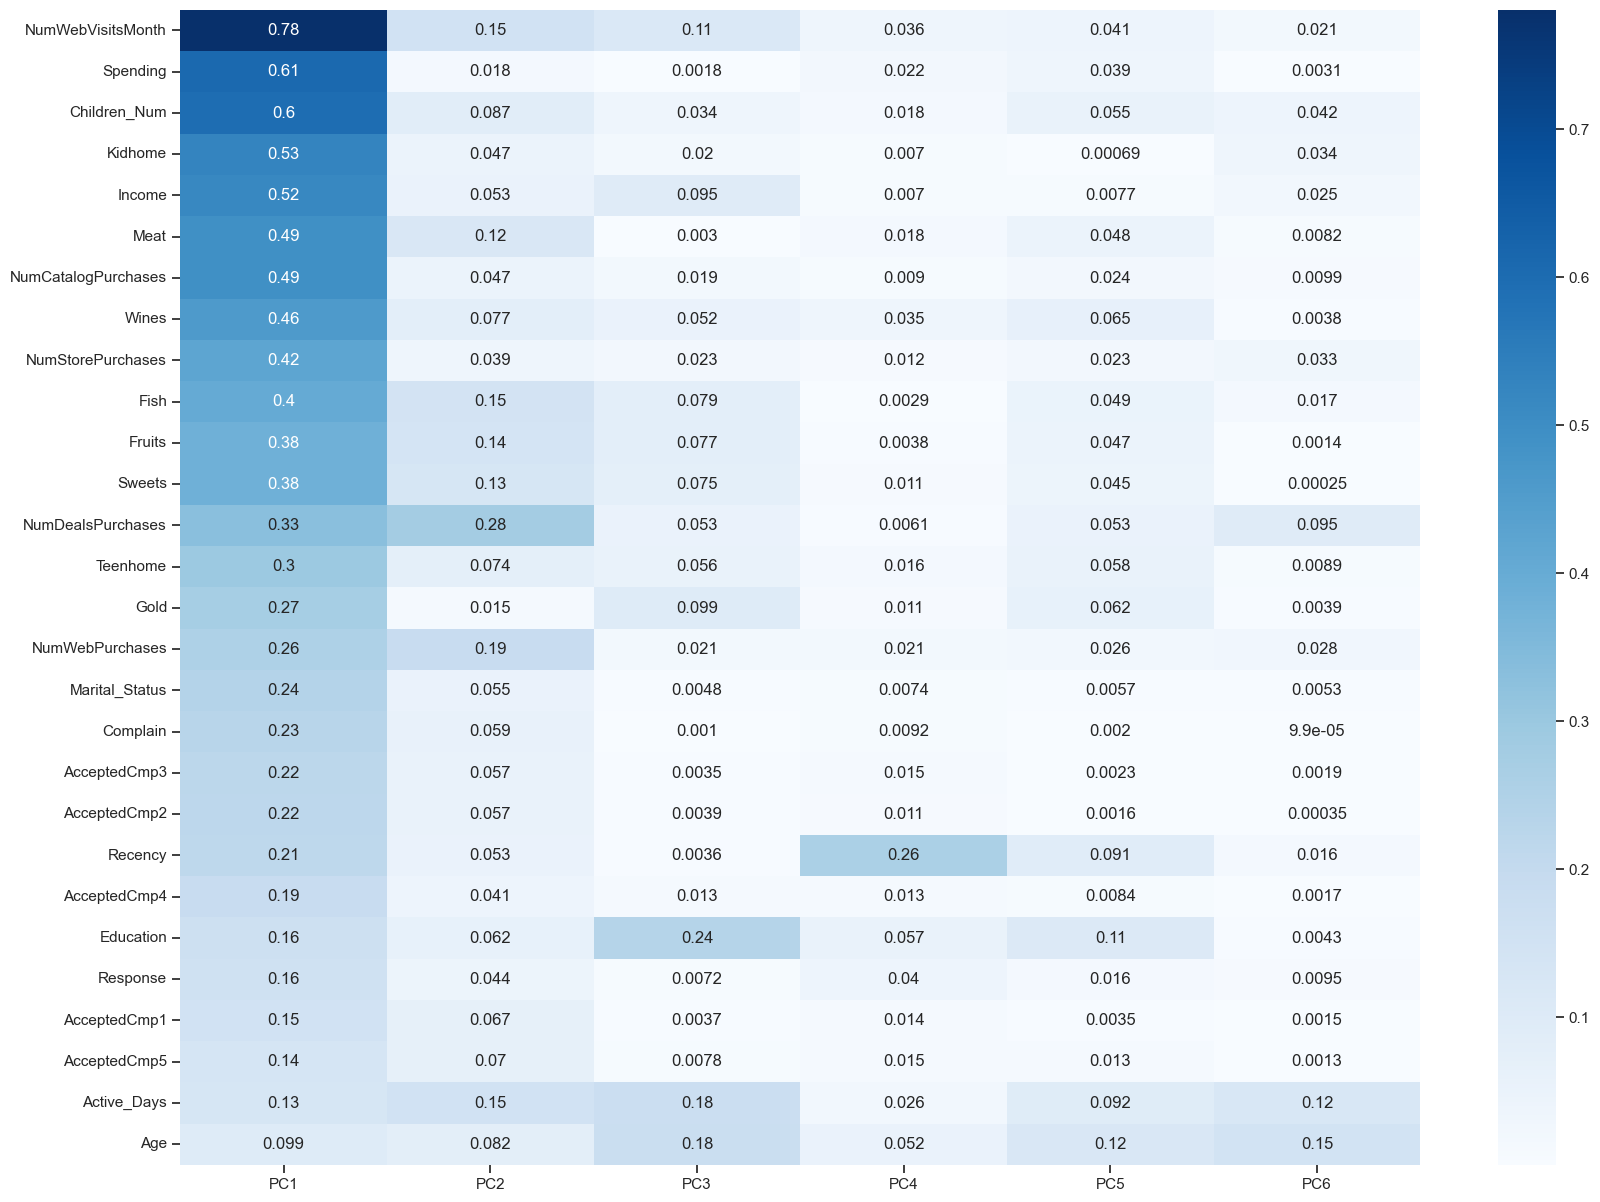

In [383]:
plt.figure(figsize=(20, 15))
sns.heatmap(feature_importance_matrix, cmap="Blues", annot=True)